In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop(columns='Exited')
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [16]:
X_train.shape

(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow

In [20]:
from tensorflow import keras

In [21]:
from tensorflow.keras import Sequential

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5336 - loss: 0.6974 - val_accuracy: 0.7981 - val_loss: 0.5139
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4758 - val_accuracy: 0.8094 - val_loss: 0.4612
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.4356 - val_accuracy: 0.8188 - val_loss: 0.4277
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.4171 - val_accuracy: 0.8288 - val_loss: 0.4014
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3946 - val_accuracy: 0.8400 - val_loss: 0.3822
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3799 - val_accuracy: 0.8413 - val_loss: 0.3705
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.3609 - val_accuracy: 0.8500 - val_loss: 0.3615
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3676 - val_accu

In [27]:
model.layers[1].get_weights()

[array([[ 1.9001842e-01,  6.4587456e-01,  5.5358064e-01, -3.8231418e-01,
         -7.1326621e-02, -2.6971114e-01,  2.3884001e-01, -3.7426096e-01,
          1.6345886e-03,  2.9763228e-01,  6.5127921e-01],
        [ 4.2893767e-01, -2.1433572e-01,  4.0397128e-01,  4.9186257e-01,
          7.2618437e-01, -2.3117384e-01, -3.9108598e-01, -3.1597042e-01,
          5.3419954e-01, -8.5072613e-01,  4.7350973e-01],
        [ 3.6818989e-02, -2.1210295e-01, -2.1377634e-01,  7.8018224e-01,
         -3.2043418e-01,  2.2117630e-02,  3.7619546e-01, -2.2985663e+00,
         -3.5102282e-02,  4.2056346e-01, -3.2078776e-01],
        [-1.0220196e+00,  3.6385494e-01,  2.7167547e-01, -1.7227341e-01,
         -3.6412808e-01, -6.8152183e-01, -1.5717533e-01, -3.9599571e-01,
         -1.0512489e+00,  7.0755041e-01,  9.2268550e-01],
        [-2.1123952e-01, -2.4048848e-01, -3.8224441e-01,  9.4406784e-01,
          1.5913725e-01,  2.6600581e-01,  4.1999283e-01,  1.6127233e-01,
          2.2191279e-01,  7.5907475e-0

In [28]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02118053],
       [0.08612932],
       [0.03192845],
       ...,
       [0.00460524],
       [0.04491641],
       [0.39931312]], dtype=float32)

In [29]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
y_prd=np.where(y_log>.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prd)

0.8575

In [32]:
import matplotlib.pyplot as plt

In [33]:
history.history

{'accuracy': [0.6893749833106995,
  0.7998437285423279,
  0.8170312643051147,
  0.8304687738418579,
  0.8401562571525574,
  0.8471875190734863,
  0.8512499928474426,
  0.8543750047683716,
  0.8557812571525574,
  0.8553125262260437,
  0.8567187786102295,
  0.8584374785423279,
  0.8571875095367432,
  0.8584374785423279,
  0.8587499856948853,
  0.8595312237739563,
  0.8587499856948853,
  0.8596875071525574,
  0.8606250286102295,
  0.8596875071525574,
  0.860156238079071,
  0.8615624904632568,
  0.8610937595367432,
  0.8620312213897705,
  0.8610937595367432,
  0.8646875023841858,
  0.8623437285423279,
  0.8621875047683716,
  0.8648437261581421,
  0.8631250262260437,
  0.8634374737739563,
  0.8631250262260437,
  0.8631250262260437,
  0.864062488079071,
  0.8642187714576721,
  0.8628125190734863,
  0.8635937571525574,
  0.86328125,
  0.8659374713897705,
  0.8659374713897705,
  0.8642187714576721,
  0.8659374713897705,
  0.8646875023841858,
  0.8662499785423279,
  0.8646875023841858,
  0.8635

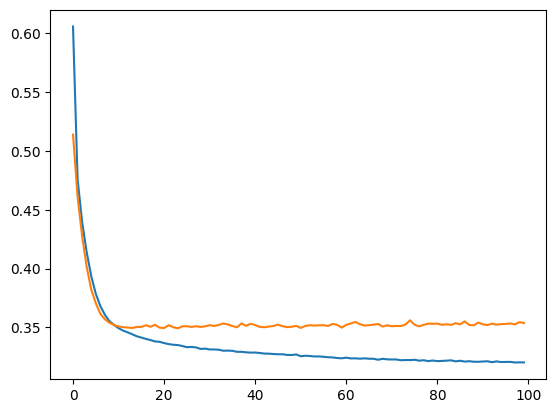

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

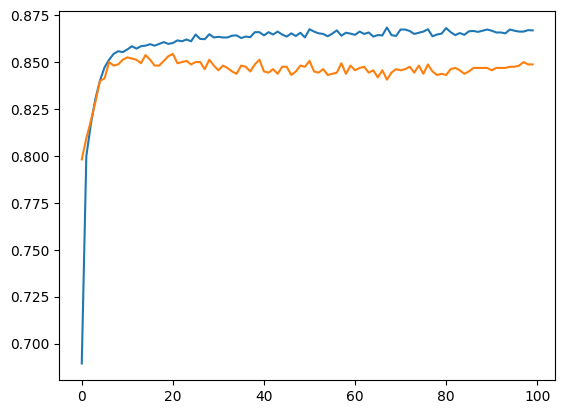

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])